# abdolazizsalimi980292626Ex3


## Q1

In [597]:
import numpy as np 

In [598]:
class XorMLP():


    def step_function(self , input , t):
        return np.where(t <= input , 1 , 0)

    def __init__(self , threshold = [] , weight = []):
        assert len(threshold) == 3 
        assert len(weight) == 3
        self.threshold = threshold
        self.w = weight
    
    def predict(self , xorInput):

        #first layer 
        input_ = xorInput * self.w[:2]
        sum_first_layer = np.sum(input_ , axis=1)
        output_first_layer = self.step_function(sum_first_layer , self.threshold[:2])
        # mun 2 layer 
        input_num2_layer = output_first_layer
        sum_num2_layer  = np.sum(input_num2_layer * self.w[-1])
        output = self.step_function(sum_num2_layer , self.threshold[-1])
        return output

In [599]:
weight = [[2,-1],[-1,2],[2,2]]
threshold = [2,2,2]
X = xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
XOR = XorMLP(threshold= threshold , weight= weight)

In [600]:

xorInput = xor_input[2]
print('xorInput:' ,xorInput )
res = XOR.predict(xorInput)
print('output:' , res )

xorInput: [1 0]
output: 1


## feed forward network 

In [601]:
import numpy as np 


class Perceptron:
    def __init__(self, learning_rate = 0.01 , n_iters = 1000):
        self.n_iters = n_iters
        self.lr = learning_rate
        self.activation_function = self.unit_activashin_f
        self.weights = None
        self.bias = None

    def fit (self , X,y):
        n_sampels , n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0 
        y_ = np.array([1 if i<0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx , x_i in enumerate(X):
                linear_output = np.dot(x_i , self.weights) + self.bias
                y_predict= self.activation_function(linear_output) 

                update = self.lr * (y[idx] - y_predict)
                self.weights += update * x_i
                self.bias += update 
        
    

    def predict(self,X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predict = self.activation_function(linear_output)
        return y_predict
        

    
        
    

    def unit_activashin_f(self , x):
        return np.where(x>=0 , 1 , 0)
    


Perceptron classification accuracy 1.0


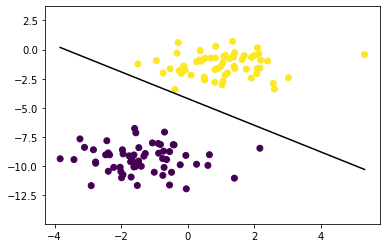

In [602]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()